In [1]:
from scipy.stats import qmc
from modcma import ModularCMAES, Parameters, Population
import ioh
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
problem_id = 3
problem_instance = 1
dimension = 2
# lambdas = [25, 25, 25, 25]
lambdas = [50, 50]
labels = [str(n) for n in range(1, len(lambdas)+1)]
budget = int(dimension * 1e4)
iterations = 1000

In [3]:
problem = ioh.get_problem(fid=problem_id, instance=problem_instance, dimension=dimension, problem_type=ioh.ProblemType.BBOB)
CMAESs = []

In [4]:
x0 = np.float64(qmc.scale(qmc.LatinHypercube(d=problem.meta_data.n_variables).random(n=len(lambdas)), l_bounds=problem.bounds.lb, u_bounds=problem.bounds.ub))#.reshape((len(lambdas), problem.meta_data.n_variables, 1))
print(x0)

[[-2.57645677  1.48349059]
 [ 1.69409869 -0.28985905]]


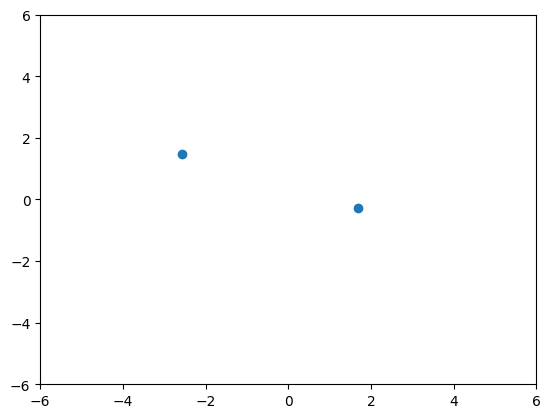

In [5]:
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(x0[:,0], x0[:,1])

In [6]:
svc = LinearSVC(C=1).fit(x0, labels)

In [7]:
x0 = x0.reshape((len(lambdas), problem.meta_data.n_variables, 1))
print(x0.shape, x0)
for i in range(len(lambdas)):
    # print(lambdas[i], lambdas[i], x0[i], budget)
    CMAESs.append(
        ModularCMAES(
            problem,
            parameters=Parameters(
                d=problem.meta_data.n_variables,
                lambda_=lambdas[i],
                mu=lambdas[i],
                # x0=x0[i],
                sigma0=0.2,
                budget=budget,
                initialization_correction="svm",
                svc=svc,
                subpopulation_target=labels[i]
            ),
        )
    )


(2, 2, 1) [[[-2.57645677]
  [ 1.48349059]]

 [[ 1.69409869]
  [-0.28985905]]]


/Users/ernestvmo/Documents/VS Code Repo/ModularCMAES/modcma/parameters.py:442: RuntimeWarning: invalid value encountered in scalar divide
  mueff_neg = self.nweights.sum() ** 2 / (self.nweights ** 2).sum()
/Users/ernestvmo/Documents/VS Code Repo/ModularCMAES/modcma/parameters.py:455: RuntimeWarning: divide by zero encountered in scalar divide
  min(amu_neg, amueff_neg, aposdef_neg) / np.abs(self.nweights).sum()


In [35]:
centroids = np.float64([CMAESs[n].parameters.m.reshape((2,)) for n in range(len(lambdas))])
centroids

array([[-7.55520669, 11.39827212],
       [ 8.48333937, -5.1086931 ]])

In [36]:
svc = svc.fit(centroids, labels)
for n in range(len(lambdas)):
    CMAESs[n].parameters.svc = svc
    CMAESs[n].step()

[0, 7, 13, 18, 19, 21, 23, 25, 27, 30, 32, 34, 45]
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
[7, 9, 10, 13, 21, 25, 26, 31, 35, 39, 41, 42, 46, 49]
['2'] 2 0
['1'] 2 0
['2'] 2 1
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0


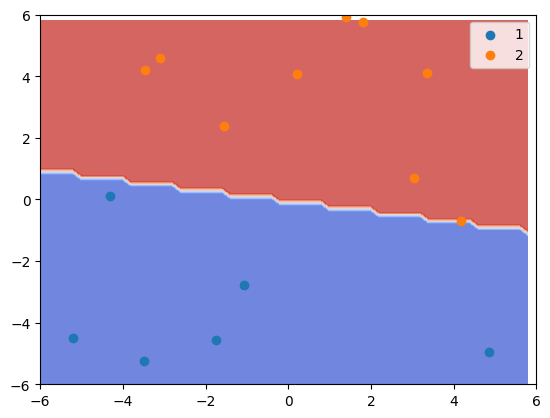

In [34]:
temp = np.float64([CMAESs[n].parameters.population.x for n in range(len(lambdas))])
sub_pops_points = [None]*len(lambdas)
for n in range(len(lambdas)):
    sub_pops_points[n] = temp[n].T
plt.xlim(-6, 6)
plt.ylim(-6, 6)
xx, yy = np.meshgrid(np.arange(-6, 6, .2), np.arange(-6, 6, .2))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape).astype(int)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
for n in range(len(lambdas)):
    plt.scatter(sub_pops_points[n][:,0], sub_pops_points[n][:,1], label=labels[n])
plt.scatter(centroids[:,0], centroids[:,1])
plt.legend()
plt.show()

In [11]:
centroids = np.float64([CMAESs[n].parameters.m.reshape((2,)) for n in range(len(lambdas))])
print(centroids)
svc = svc.fit(centroids, labels)
for n in range(len(lambdas)):
    CMAESs[n].parameters.svc = svc
    CMAESs[n].step()

[[ 3.62418485  3.74973065]
 [-1.91986752  0.08685851]]
[3, 8, 10, 12, 13, 18, 19, 20, 30, 31, 34, 36, 37, 38, 43, 46, 48]
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['2'] 1 0
['1'] 1 1
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
['1'] 1 0
[5, 10, 13, 14, 17, 20, 29, 30, 32, 42, 46]
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0
['2'] 2 0


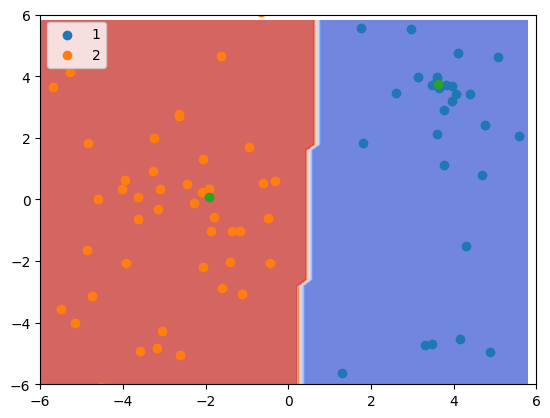

In [12]:
temp = np.float64([CMAESs[n].parameters.population.x for n in range(len(lambdas))])
sub_pops_points = [None]*len(lambdas)
for n in range(len(lambdas)):
    sub_pops_points[n] = temp[n].T
plt.xlim(-6, 6)
plt.ylim(-6, 6)
xx, yy = np.meshgrid(np.arange(-6, 6, .2), np.arange(-6, 6, .2))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape).astype(int)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
for n in range(len(lambdas)):
    plt.scatter(sub_pops_points[n][:,0], sub_pops_points[n][:,1], label=labels[n])
plt.scatter(centroids[:,0], centroids[:,1])
plt.legend()
plt.show()

In [13]:
raise ValueError

ValueError: 

In [ ]:
for _ in range(1000):
    for j in range(len(CMAESs)):
        CMAESs[j].step()

In [ ]:
for cma in CMAESs:
    print(f"CMA: f:{cma.parameters.fopt}, {cma._fitness_func.optimum.y}, {cma.parameters.population}")